In [1]:
import sys
import os
import numpy as np
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt

In [2]:
def extractMFCCs(path, genre=None, print_message=True):
    """
    Extract MFCCs from sound files in folder
    Genre shift is used to convert from indexing per genre (4 times 1-100) to indexing over all samples (1-400)
    There are some songs of shorter duration, their MFCC array will be filled with -1's 
    """

    sample_rate = 44100
    
    duration = 60.02938776  # seconds per song. Shorter songs are accounted for later

    n_fft = 8192
    
    
    n_MFCC = 20
    win_length = int(0.025*sample_rate)
    hop_length = int(0.010*sample_rate)

    # used to make all mfcc arrays of same size for vectorization
    length_mfcc_sequence = int(np.floor((duration*sample_rate-win_length)/hop_length))
    number_of_samples_per_genre = 100

    MFCCs = np.full((number_of_samples_per_genre, n_MFCC, length_mfcc_sequence), np.nan)
    
    for file in os.scandir(path):
        if file.path.endswith(".mp3"):
            if print_message:
                print("analyzing ", file.name, file.path)

            currentpath = path + "/" + file.name
            int_track = int(file.name[:-4])

            sound, sample_rate = librosa.load(currentpath, sr=None, mono=True)
            
            mfcc = librosa.feature.mfcc(
                sound, sr=sample_rate, n_fft=n_fft, n_mfcc=n_MFCC, hop_length=hop_length, win_length=win_length)

            if np.shape(mfcc)[1] <= length_mfcc_sequence:
                mfcc = np.append(mfcc, 
                                 np.full((n_MFCC, length_mfcc_sequence-np.shape(mfcc)[1]), np.nan),
                                axis=-1)

            elif np.shape(mfcc)[1] > length_mfcc_sequence:
                mfcc = mfcc[:, :length_mfcc_sequence]

            print(int_track, np.shape(mfcc))

            MFCCs[int_track-1] = mfcc

    return MFCCs # , INDEX

In [3]:
path = "../data/emotifymusic/"
genres = ["classical", "electronic", "pop", "rock"]

MFCC = []

for genre in genres:
    mfccs= extractMFCCs(path+genre, genre=genre)
    MFCC.append(mfccs)
    
MFCC_reshaped = np.reshape(MFCC, (np.shape(MFCC)[0]*np.shape(MFCC)[1], np.shape(MFCC)[2], np.shape(MFCC)[3]))
    
np.savez_compressed('MFCC', MFCC_reshaped)

analyzing  1.mp3 ../data/emotifymusic/classical\1.mp3


C:\Users\sergi\anaconda3\lib\site-packages\librosa\core\audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


1 (20, 6000)
analyzing  10.mp3 ../data/emotifymusic/classical\10.mp3
10 (20, 6000)
analyzing  100.mp3 ../data/emotifymusic/classical\100.mp3
100 (20, 6000)
analyzing  11.mp3 ../data/emotifymusic/classical\11.mp3
11 (20, 6000)
analyzing  12.mp3 ../data/emotifymusic/classical\12.mp3
12 (20, 6000)
analyzing  13.mp3 ../data/emotifymusic/classical\13.mp3
13 (20, 6000)
analyzing  14.mp3 ../data/emotifymusic/classical\14.mp3
14 (20, 6000)
analyzing  15.mp3 ../data/emotifymusic/classical\15.mp3
15 (20, 6000)
analyzing  16.mp3 ../data/emotifymusic/classical\16.mp3
16 (20, 6000)
analyzing  17.mp3 ../data/emotifymusic/classical\17.mp3
17 (20, 6000)
analyzing  18.mp3 ../data/emotifymusic/classical\18.mp3
18 (20, 6000)
analyzing  19.mp3 ../data/emotifymusic/classical\19.mp3
19 (20, 6000)
analyzing  2.mp3 ../data/emotifymusic/classical\2.mp3
2 (20, 6000)
analyzing  20.mp3 ../data/emotifymusic/classical\20.mp3
20 (20, 6000)
analyzing  21.mp3 ../data/emotifymusic/classical\21.mp3
21 (20, 6000)
analyzi

In [4]:
"""
Load as:
"""

# data = np.load('MFCCtest2.npz') 
# np.shape(data['classical'])

'\nLoad as:\n'

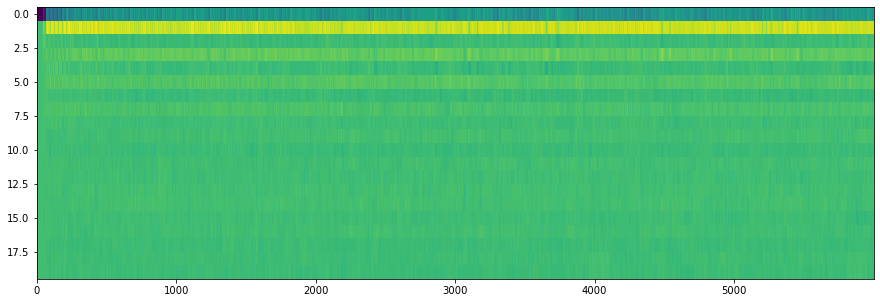

In [5]:
N = 200  # choose sample #
fig, ax = plt.subplots(figsize=(15, 5))
ax.imshow(MFCC_reshaped[N], interpolation='nearest', aspect='auto')
plt.show()

In [6]:
G = 2
N_sample = 1

n_fft = 8192
n_MFCC = 20

win_length = int(0.025*sample_rate)
hop_length = int(0.010*sample_rate)

currentpath = "../data/emotifymusic/" + genres[G] + "/" + str(N_sample) + ".mp3"

sound, sample_rate = librosa.load(currentpath, sr=None, mono=True)
mfcc = librosa.feature.mfcc(sound, sr=sample_rate, n_fft=n_fft, n_mfcc=n_MFCC, hop_length=hop_length, win_length=win_length)

fig, ax = plt.subplots(figsize=(15, 5))
ax.imshow(mfcc, interpolation='nearest', aspect='auto')
plt.show()

NameError: name 'sample_rate' is not defined